In [ ]:
#TODO
#Get the data on the same scale, probably get everything in percentages or something

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read in the data
data = pd.read_csv("Market Data USDZAR.csv")

In [ ]:
#The data is in reverse order, correct that
data = data[::-1]
data.reset_index(inplace=True,drop=True)

In [ ]:
#Define the forecast horizon
look_ahead = 20

In [ ]:
#Calculate the angle formed by the changes in price, using a ratio of high and low price.
#Then calculate arctan to realize the angle formed by the changes in pirce
data["Slope"] =  (data["Close"] - data["Close"].shift(look_ahead))/(data["Open"] - data["Open"].shift(look_ahead))
data["Angle"] =  np.arctan(data["Slope"])

data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Open          High           Low         Close        Slope  \
count  10001.000000  10001.000000  10001.000000  10001.000000  9917.000000   
mean      18.142707     18.144834     18.140697     18.142731          NaN   
std        0.113330      0.113499      0.113199      0.113345          NaN   
min       17.925900     17.925900     17.925900     17.925900         -inf   
25%       18.032100     18.034800     18.025600     18.031900     0.644231   
50%       18.177800     18.181550     18.175300     18.177700     0.967604   
75%       18.235880     18.238200     18.234500     18.235900     1.190476   
max       18.370300     18.373900     18.364500     18.370300          inf   

             Angle  
count  9917.000000  
mean      0.608200  
std       0.577221  
min      -1.570796  
25%       0.572309  
50%       0.768935  
75%       0.872137  
max       1.570796

In [ ]:
data.loc[data["Slope"] == np.NaN]

Empty DataFrame
Columns: [Time, Open, High, Low, Close, Slope, Angle]
Index: []

In [ ]:
data.loc[data["Slope"] == np.inf]

Time     Open      High      Low     Close  Slope  \
1313  2024.07.12 06:38:00  18.0023  18.00270  18.0015  18.00270    inf   
1807  2024.07.12 14:52:00  17.9915  17.99600  17.9908  17.99490    inf   
2268  2024.07.14 22:44:00  17.9525  17.98400  17.9525  17.98400    inf   
3227  2024.07.15 14:43:00  18.2471  18.24770  18.2465  18.24710    inf   
5427  2024.07.17 03:38:00  18.0484  18.05030  18.0477  18.04920    inf   
5497  2024.07.17 04:48:00  18.0447  18.04500  18.0438  18.04450    inf   
7304  2024.07.18 11:18:00  18.2335  18.23980  18.2335  18.23710    inf   
7622  2024.07.18 16:36:00  18.1851  18.18770  18.1848  18.18710    inf   
7926  2024.07.18 21:40:00  18.2345  18.24320  18.2345  18.24320    inf   
7951  2024.07.18 22:05:00  18.2445  18.25680  18.2445  18.25680    inf   
8005  2024.07.18 23:00:00  18.2485  18.25880  18.2408  18.25320    inf   
8117  2024.07.19 00:52:00  18.2659  18.26610  18.2655  18.26610    inf   
8252  2024.07.19 03:07:00  18.2790  18.27967  18.2790  18.27931    inf   
8285  2024.07.19 03:40:00  18.2802  18.28020  18.2802  18.28020    inf   
9621  2024.07.22 03:40:00  18.2404  18.24120  18.2402  18.24090    inf   
9643  2024.07.22 04:02:00  18.2408  18.24080  18.2403  18.24070    inf   

         Angle  
1313  1.570796  
1807  1.570796  
2268  1.570796  
3227  1.570796  
5427  1.570796  
5497  1.570796  
7304  1.570796  
7622  1.570796  
7926  1.570796  
7951  1.570796  
8005  1.570796  
8117  1.570796  
8252  1.570796  
8285  1.570796  
9621  1.570796  
9643  1.570796

Text(0.5, 1.0, 'A slope of INF means the price has not changed')

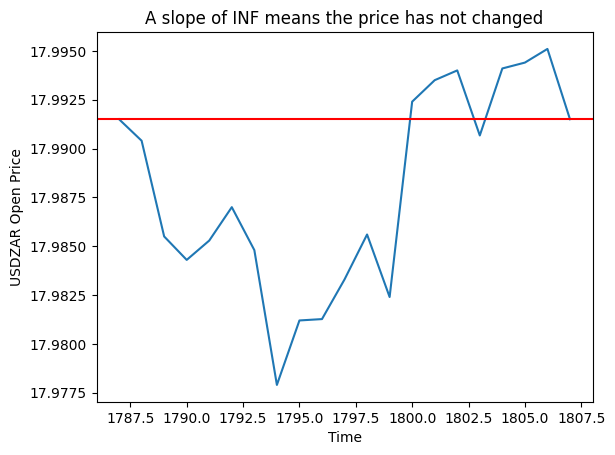

In [ ]:
pt = 1807
y = data.loc[pt,"Open"]
plt.plot(data.loc[(pt - look_ahead):pt,"Open"])
plt.axhline(y=y,color="red")
plt.xlabel("Time")
plt.ylabel("USDZAR Open Price")
plt.title("A slope of INF means the price has not changed")

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().any()

Time     False
Open     False
High     False
Low      False
Close    False
Slope     True
Angle     True
dtype: bool

In [ ]:
data.reset_index(drop=True,inplace=True)

<Axes: >

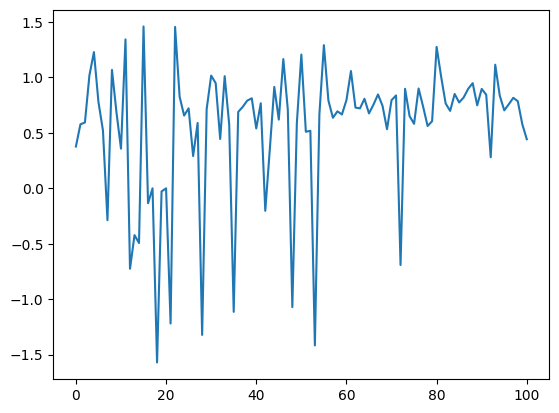

In [ ]:
data.loc[:100,"Angle"].plot()

In [ ]:
#How clean are the signals generated?
1 - (data.loc[(data["Slope"] < data["Slope"].shift(-look_ahead)) & (data["Close"] > data["Close"].shift(-look_ahead))].shape[0] / data.loc[(data["Slope"] < data["Slope"].shift(-look_ahead))].shape[0])

0.5065065065065065

In [ ]:
#Define our inputs and target
ohlc_inputs      = ["Open","High","Low","Close"]
trig_inputs      = ["Angle"]
all_inputs       = ohlc_inputs + trig_inputs
cv_inputs        = [ohlc_inputs,trig_inputs,all_inputs]
target           = "Target"

In [ ]:
#Define the target
data["Target"] = data["Close"].shift(-look_ahead)

In [ ]:
#Add a few labels
data["Bull Bear"] = np.nan
data["Angle Up Down"] = np.nan

data.loc[data["Close"] > data["Close"].shift(look_ahead), "Bull Bear"] = 0
data.loc[data["Angle"] > data["Angle"].shift(look_ahead),"Angle Up Down"] = 0
data.loc[data["Close"] < data["Close"].shift(look_ahead), "Bull Bear"] = 1
data.loc[data["Angle"] < data["Angle"].shift(look_ahead),"Angle Up Down"] = 1

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data

Time      Open      High       Low     Close     Slope  \
0     2024.07.11 09:22:00  18.06660  18.06896  18.06560  18.06660 -2.727273   
1     2024.07.11 09:23:00  18.06660  18.07775  18.06655  18.07243  8.691667   
2     2024.07.11 09:24:00  18.07240  18.07400  18.07030  18.07030  1.089423   
3     2024.07.11 09:25:00  18.07030  18.07140  18.07000  18.07080  0.770521   
4     2024.07.11 09:26:00  18.07080  18.07140  18.06810  18.06880  0.880447   
...                   ...       ...       ...       ...       ...       ...   
9684  2024.07.22 09:35:00  18.25960  18.26063  18.25840  18.26029  1.312739   
9685  2024.07.22 09:36:00  18.26029  18.26078  18.25848  18.25952  1.025780   
9686  2024.07.22 09:37:00  18.26013  18.26055  18.25890  18.25904  0.550974   
9687  2024.07.22 09:38:00  18.25904  18.25992  18.25904  18.25924  0.829309   
9688  2024.07.22 09:39:00  18.25924  18.26130  18.25840  18.25860  1.011044   

         Angle    Target  Bull Bear  Angle Up Down  
0    -1.219352  18.07210        0.0            1.0  
1     1.456247  18.07130        0.0            0.0  
2     0.828170  18.06990        0.0            1.0  
3     0.656506  18.07028        0.0            1.0  
4     0.721907  18.06850        0.0            1.0  
...        ...       ...        ...            ...  
9684  0.919807  18.27260        1.0            0.0  
9685  0.798124  18.27010        1.0            0.0  
9686  0.503591  18.27240        1.0            0.0  
9687  0.692359  18.27390        1.0            0.0  
9688  0.790890  18.27390        1.0            0.0  

[9689 rows x 10 columns]

<Axes: >

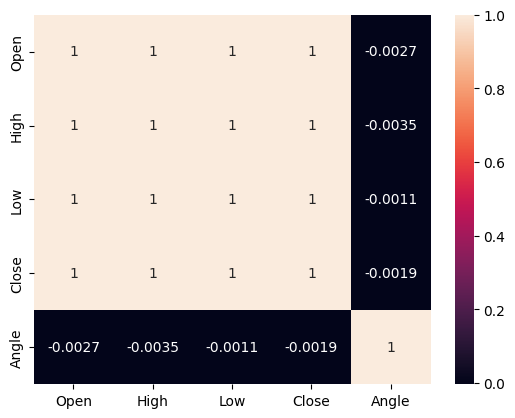

In [ ]:
#Let's analyze the correlation levels
sns.heatmap(data.loc[:,all_inputs].corr(),annot=True)

<Axes: xlabel='Angle', ylabel='Close'>

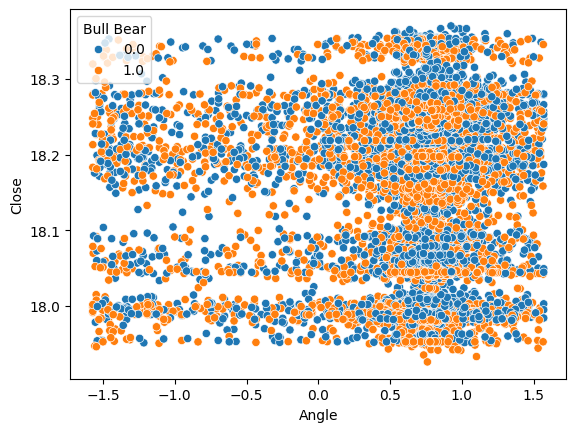

In [ ]:
sns.scatterplot(data=data,y="Close",x="Angle",hue="Bull Bear")

<Axes: xlabel='Angle', ylabel='Slope'>

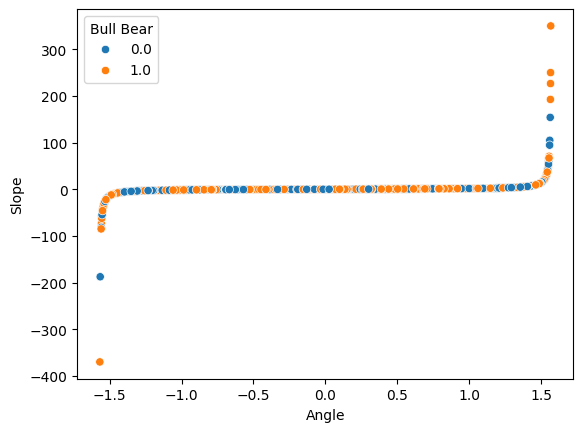

In [ ]:
sns.scatterplot(data=data,x="Angle",y="Slope",hue="Bull Bear")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Angle Up Down', ylabel='Close'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


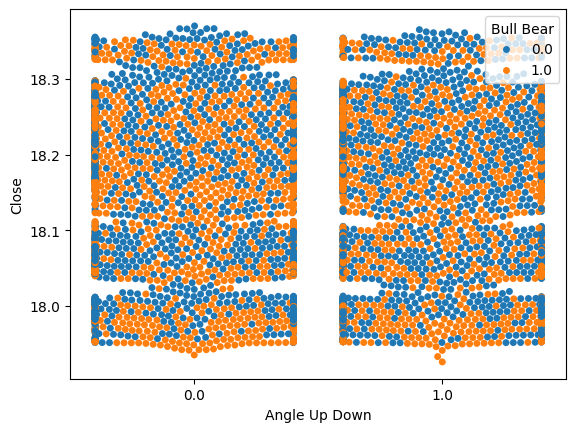

In [ ]:
sns.swarmplot(data=data,x="Angle Up Down",y="Close",hue="Bull Bear")

Text(0.5, 0, 'Close')

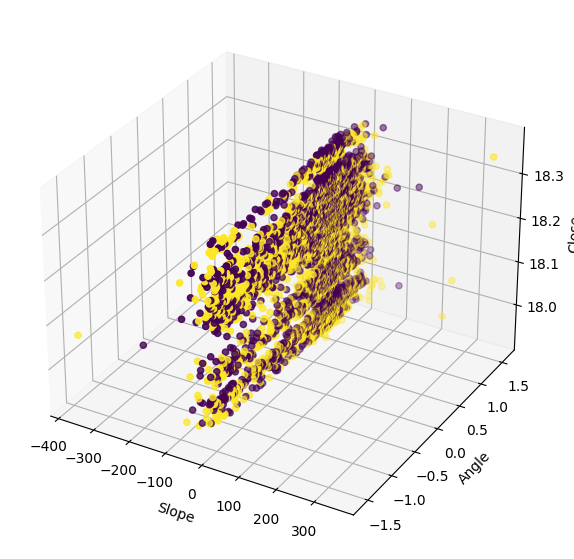

In [ ]:
#Define the 3D Plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.scatter(data["Slope"],data["Angle"],data["Close"],c=data["Bull Bear"])
ax.set_xlabel("Slope")
ax.set_ylabel("Angle")
ax.set_zlabel("Close")

<Axes: xlabel='Angle Up Down', ylabel='Close'>

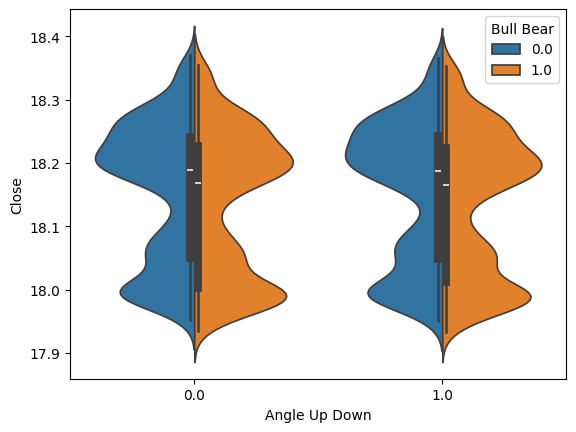

In [ ]:
sns.violinplot(data=data,x="Angle Up Down",y="Close",hue="Bull Bear",split=True)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#Let's split our data into train test splits
train_data, test_data = train_test_split(data,test_size=0.5,shuffle=False)

In [ ]:
#Scale the data
scaler = StandardScaler()
scaler.fit(train_data[all_inputs])
train_scaled= pd.DataFrame(scaler.transform(train_data[all_inputs]),columns=all_inputs)
test_scaled = pd.DataFrame(scaler.transform(test_data[all_inputs]),columns=all_inputs)

In [ ]:
#Create a dataframe to store our accuracy in training and testing
columns = [
    "Random Forest",
    "Bagging",
    "Gradient Boosting",
    "AdaBoost",
    "Linear SVR",
    "Linear Regression",
    "Ridge",
    "Lasso",
    "Elastic Net",
    "K Neighbors",
    "Decision Tree",
    "Neural Network"
]
index = ["OHLC","Angle","All"]
accuracy = pd.DataFrame(columns=columns,index=index)

In [ ]:
#Store the models
models = [
  RandomForestRegressor(),
  BaggingRegressor(),
  GradientBoostingRegressor(),
  AdaBoostRegressor(),
  LinearSVR(),
  LinearRegression(),
  Ridge(),
  Lasso(),
  ElasticNet(),
  KNeighborsRegressor(),
  DecisionTreeRegressor(),
  MLPRegressor(hidden_layer_sizes=(4,6))
]

In [ ]:
np.arange(0,len(cv_inputs))

array([0, 1, 2])

In [ ]:
#Cross validate the models
#First we have to iterate over the inputs
for k in np.arange(0,len(cv_inputs)):
  current_inputs = cv_inputs[k]
  #Then fit each model on that set of inputs
  for i in np.arange(0,len(models)):
    score = cross_val_score(models[i],train_scaled[current_inputs],train_data[target],cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    accuracy.iloc[k,i] = -score.mean()

In [ ]:
accuracy

Random Forest   Bagging Gradient Boosting  AdaBoost Linear SVR  \
OHLC       0.000592  0.000585          0.000467  0.000703   0.000279   
Angle      0.017285  0.017644          0.013695  0.012366   0.017032   
All        0.000599  0.000634          0.000469  0.000684   0.000286   

      Linear Regression     Ridge     Lasso Elastic Net K Neighbors  \
OHLC           0.000285  0.000284  0.013416    0.013416    0.000636   
Angle          0.013432  0.013432  0.013416    0.013416    0.015404   
All            0.000285  0.000285  0.013416    0.013416    0.000504   

      Decision Tree Neural Network  
OHLC       0.000934       0.083363  
Angle      0.021332       0.016883  
All        0.001003       0.145183

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = KNeighborsRegressor(n_jobs=-1)

In [ ]:
tuner = RandomizedSearchCV(model,
  {
    "n_neighbors": [2,3,4,5,6,7,8,9,10],
    "weights": ["uniform","distance"],
    "algorithm": ["auto","ball_tree","kd_tree","brute"],
    "leaf_size": [1,2,3,4,5,10,20,30,40,50,60,100,200,300,400,500,1000],
    "p": [1,2]
  },
    n_iter = 100,
    n_jobs=-1,
    cv=5
)

In [ ]:
tuner.fit(train_scaled.loc[:,all_inputs],train_data[target])

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 10, 20, 30,
                                                      40, 50, 60, 100, 200, 300,
                                                      400, 500, 1000],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [ ]:
tuner.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 10,
 'leaf_size': 100,
 'algorithm': 'ball_tree'}

In [ ]:
tuner.best_score_

0.7106899297793474

In [ ]:
#Testing for over fitting
model = KNeighborsRegressor(n_jobs=-1)

custom_model = KNeighborsRegressor(n_jobs=-1,weights= 'uniform',p=1,n_neighbors= 10,leaf_size= 100,algorithm='ball_tree')

In [ ]:
model.fit(train_scaled.loc[:,all_inputs],train_data[target])
custom_model.fit(train_scaled.loc[:,all_inputs],train_data[target])

KNeighborsRegressor(algorithm='ball_tree', leaf_size=100, n_jobs=-1,
                    n_neighbors=10, p=1)

In [ ]:
mean_squared_error(test_data[target],model.predict(test_scaled.loc[:,all_inputs]))

0.0009797322460441842

In [ ]:
mean_squared_error(test_data[target],custom_model.predict(test_scaled.loc[:,all_inputs]))

0.0009697248896608824

In [ ]:
data.loc[:,all_inputs].mean()

Open     18.143698
High     18.145870
Low      18.141644
Close    18.143724
Angle     0.608216
dtype: float64

In [ ]:
data.loc[:,all_inputs].std()

Open     0.112957
High     0.113113
Low      0.112835
Close    0.112970
Angle    0.580481
dtype: float64

In [ ]:
data.loc[:,all_inputs].mean().to_csv("USDZAR M1 MEAN.csv")
data.loc[:,all_inputs].std().to_csv("USDZAR M1 STD.csv")

In [ ]:
data.loc[:,all_inputs] = ((data.loc[:,all_inputs] - data.loc[:,all_inputs].mean())/ data.loc[:,all_inputs].std())

In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
#Define the input shape
initial_type = [('float_input', FloatTensorType([1, len(all_inputs)]))]

In [ ]:
#Fit the model on all the data we have
custom_model.fit(data.loc[:,all_inputs],data.loc[:,"Target"])

KNeighborsRegressor(algorithm='ball_tree', leaf_size=100, n_jobs=-1,
                    n_neighbors=10, p=1)

In [ ]:
#Convert the model to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type,target_opset=12)

In [ ]:
#Save the ONNX model
onnx.save(onnx_model,"USDZAR M1 OHLC Angle.onnx")